In [1]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import decode_predictions
from keras.applications.inception_v3 import preprocess_input

#Model for Resnet
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.applications.resnet50 import decode_predictions
#from keras.applications.resnet50 import preprocess_input

#Model for VGG16
#from tensorflow.keras.applications import VGG16
#from keras.applications.vgg16 import preprocess_input
#from tensorflow.keras.applications.vgg16 import decode_predictions


from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image as PImage

# For ResNet and VGG, img_width, img_height = 224, 224

img_width, img_height = 299, 299

#for ResNet, InceptionV3 will be replaced by ResNet50, for VGG, InceptionV3 will be replaced by VGG16

model_pretrained = InceptionV3(weights='imagenet', 
                      include_top=True, 
                      input_shape=(img_height, img_width, 3))

Using TensorFlow backend.


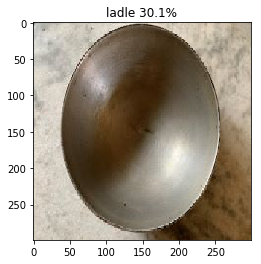

In [2]:
# Insert correct path of your image below
img_path = '/home/.../visual_search/imagecnn/wok.JPG'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

cnn_feature = model_pretrained.predict(img_data,verbose=0)
label = decode_predictions(cnn_feature)
label = label[0][0]


plt.imshow(img)

stringprint ="%.1f" % round(label[2]*100,1)
#plt.title(label[1] + str(""%.1f" label[2]*100))
plt.title(label[1] + " " + str(stringprint) + "%")
plt.show()



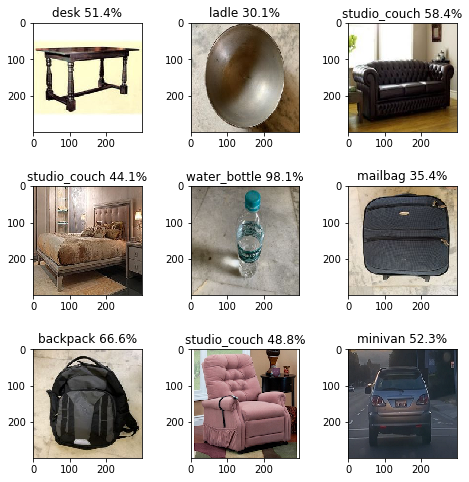

In [3]:
# Insert correct path of your image folder below

folder_path = '/home/.../visual_search/imagecnn/'
images = os.listdir(folder_path)
fig = plt.figure(figsize=(8,8))
i=0
rows=3
columns=3

for image1 in images:
    i+=1
    im = image.load_img(folder_path+image1, target_size=(img_width, img_height))
    img_data = image.img_to_array(im)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    cnn_feature = model_pretrained.predict(img_data,verbose=0)
    label = decode_predictions(cnn_feature)
    label = label[0][0]
    
    fig.add_subplot(rows,columns,i)
    fig.subplots_adjust(hspace=.5)

    plt.imshow(im)
    stringprint ="%.1f" % round(label[2]*100,1)
    plt.title(label[1] + " " + str(stringprint) + "%")
plt.show()
        